# Primer entrega
 
Llegamos al final del primer sprint y estamos en condiciones de analizar un dataset, entrenar un primer modelo (de regresión o clasificación) y evaluar resultados.
 
En este proyecto, trabajaremos con un dataset que contiene información sobre personas. La idea es predecir si la persona tiene un salario anual mayor a 50K dólares.
 
### Consignas:

A diferencia de los trabajos que venimos haciendo en clases, en los cuáles nos íbamos guiando por consignas o tips en un notebook, en este caso les toca a ustedes definir qué análisis les parece necesario hacer, qué algoritmo utilizar y qué métrica medir (justificando por qué).
 
La idea es que el notebook sea una especie de "informe" en el que ustedes puedan explicar de forma simple a una persona cualquiera lo que hicieron. Aprovechen las celdas de texto y agreguen los gráficos que les parezca necesarios. Como primer paso, deben identificar si se trata de un problema de regresión o clasificación, hacer un análisis exploratorio de los datos (presentando conclusiones siempre) y finalmente entrenar un modelo para generar sus predicciones.
 
Si les es útil, pueden agregar datos de otras fuentes (por ejemplo datasets públicos del país, o lo que sea) siempre justificando sus decisiones.
 
Son libres de probar cualquiera de los modelos que vimos, pueden dejar los resultados de todo lo que prueben con sus correspondientes conclusiones para mostrar cómo llegan al resultado final.

Se les entrega 3 archivos:
- train.csv: Es el dataset que utilizarán para entrenar su modelo. Contiene features y el target
- test.csv: Este archivo, contiene únicamente features (incluyendo el ID de la persona). Ustedes deben predecir el target para todas estas personas y armar un archivo que contenga las columnas ID, PRED 
- submit_example.csv: El archivo que entreguen tiene que tener exactamente este formato, pero con sus predicciones. Es decir, tiene que contener las columnas ID (que se corresponde al ID de la persona en el set test.csv) y PRED (que toma los valores 1 y 0. 1 significa que la persona gana más de 50K y 0 significa que no).

Deben entregar:
- Notebook con análisis e implementación del modelo predictivo
- Archivo en formato csv con las predicciones para el set de test.

## A tener en cuenta

- En la columna workclass van a ver los valores: 'Self-emp-not-inc' y 'Self-emp-inc' [acá](https://smallbiztrends.com/2013/11/incorporated-versus-unincorporated-self-employment.html) pueden encontrar info sobre su significado.
- Con pandas tienen la función to_csv que les permite exportar un dataframe a csv. Recuerden que tienen que especificar en el parámetro index, que no quieren que el index quede en el archivo csv.

## Archivos

Los archivos necesarios pueden descargarlos de los siguientes links:

- [train.csv](https://drive.google.com/file/d/1fpy7JaVdFlFPHa3kWKmem_E4O7NqhBax/view?usp=sharing)
- [test.csv](https://drive.google.com/file/d/1z927EgBNSOJ3iWorIGz2XEjlrfD0Koaw/view?usp=sharing)
- [submit_example.csv](https://drive.google.com/file/d/1JAdndD1u1F2_TzM-uhArTWW7eepupmuZ/view?usp=sharing)

## Fecha de entrega

La entrega se tiene que enviar por mail (puede ser un link a google drive).

1 entrega por grupo.

Por favor indicar el nombre de todos los integrantes en el mail o al comienzo del notebook.

Fecha limite: Domingo 10 de julio de 2022.

#Importando las librerías necesarias

In [1]:
!pip install matplotlib=="3.5.2"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Montar Google Drive para lectura de archivo

In [126]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [286]:
df = pd.read_csv('/content/drive/MyDrive/Data Science - Icaro/Sprints/train.csv', na_values = ('?','')) #para discriminar los valores nulos

# Análisis Exploratorio del dataset

In [287]:
df.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639


###***Variable Objetivo : Income - Problema de Clasificación**

Formateo de la variable objetivo a valores numéricos

In [288]:
df.income.nunique()

2

In [289]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [290]:
df['income']=df['income'].map({
    '<=50K': 0, 
    '>50K': 1})
df.head(4)

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,0,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,1,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,1,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,1,7107


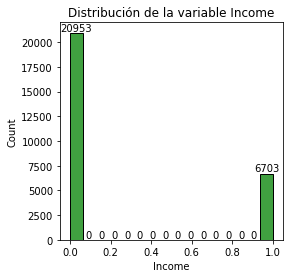

In [291]:
fig, ax = plt.subplots(figsize=(4,4))
y = sns.histplot(data=df.income, color = "green")
y.set(xlabel='Income')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Income")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


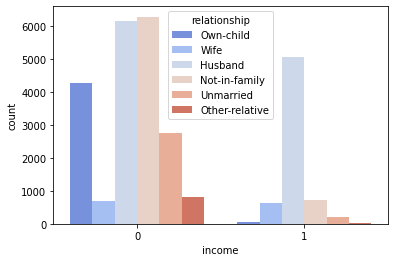

In [292]:
sns.countplot(df['income'], palette='coolwarm', hue='relationship', data=df);

##Tamaño del dataset

In [293]:
df.shape

(27656, 16)

##Analizando las columnas del dataset

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           27656 non-null  int64 
 1   age             27656 non-null  int64 
 2   workclass       26117 non-null  object
 3   education       27656 non-null  object
 4   education.num   27656 non-null  int64 
 5   marital.status  27656 non-null  object
 6   occupation      26110 non-null  object
 7   relationship    27656 non-null  object
 8   race            27656 non-null  object
 9   sex             27656 non-null  object
 10  capital.gain    27656 non-null  int64 
 11  capital.loss    27656 non-null  int64 
 12  hours.per.week  27656 non-null  int64 
 13  native.country  27152 non-null  object
 14  income          27656 non-null  int64 
 15  ID              27656 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.4+ MB


##Tipo de Datos

In [295]:
df.dtypes

index              int64
age                int64
workclass         object
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
ID                 int64
dtype: object

##Valores Nulos

In [296]:
df.isna().sum()

index                0
age                  0
workclass         1539
education            0
education.num        0
marital.status       0
occupation        1546
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     504
income               0
ID                   0
dtype: int64

In [297]:
df.describe()

,index,age,education.num,capital.gain,capital.loss,hours.per.week,income,ID
count,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000
mean,16274.894851,38.610356,10.093506,1099.991503,88.284387,40.446666,0.242371,16267.565736
std,9410.041750,13.659928,2.566083,7487.323462,405.821328,12.369212,0.428525,9403.092602
min,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8104.750000,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,8104.750000
50%,16296.000000,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,16291.000000
75%,24431.250000,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000,24416.250000
max,32559.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,32535.000000


##Variables Categóricas


*   workclass
*   education
*   marital.status
*   occupation
*   relationship
*   race
*   sex
*   native.country




##Variables Numéricas


*   index
*   age
*   education.num
*   capital.gain
*   capital.loss
*   hours.per.week
*   income
*   ID



##Análisis Variables Categóricas

Se busca la relación entre los valores nulos y las demás categorías de datos para definir la estrategia a utilizar.

In [298]:
df_filtered = df[pd.isna(df['workclass'])]

-          education – The highest level of education achieved for that individual. This is nominal attribute. The ordered levels of the attributes: Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate.

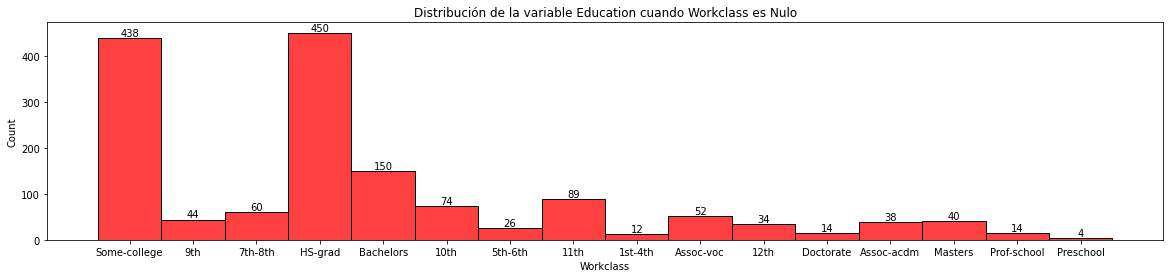

In [299]:
fig, ax = plt.subplots(figsize=(20,4))
y = sns.histplot(data=df_filtered.education, color = "red")
#y.set_style('darkgrid')
y.set(xlabel='Workclass')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Education cuando Workclass es Nulo")
plt.show()

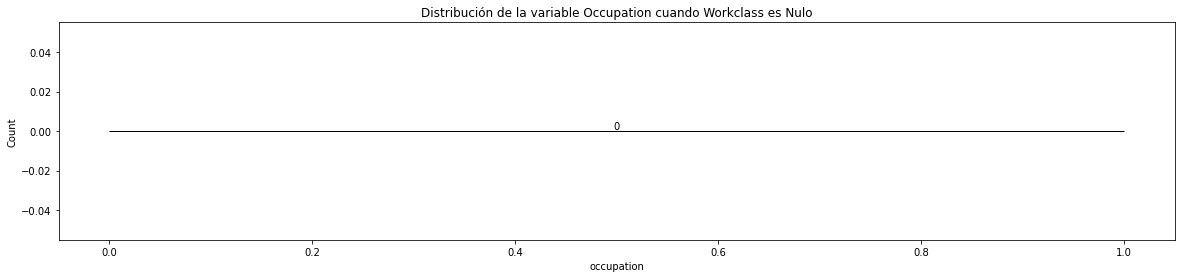

In [300]:
fig, ax = plt.subplots(figsize=(20,4))
y = sns.histplot(data=df_filtered.occupation, color = "red")
y.set(xlabel='occupation')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Occupation cuando Workclass es Nulo")
plt.show()

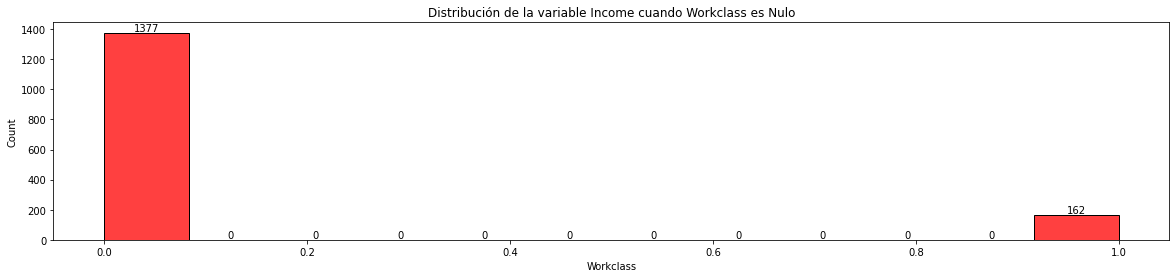

In [301]:
fig, ax = plt.subplots(figsize=(20,4))
y = sns.histplot(data=df_filtered.income, color = "red")
y.set(xlabel='Workclass')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Income cuando Workclass es Nulo")
plt.show()

Conclusión: los trabajadores sin workclass registrada son personas con secundario y/o universitario incompleto y ganan menos de 50mil. Se completará ambos registros con la moda (para workclass: private y para occupation:prof specialty)

###Workclass 💼



In [144]:
df.workclass.unique()

array(['Local-gov', 'Private', 'Federal-gov', 'Self-emp-not-inc', nan,
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

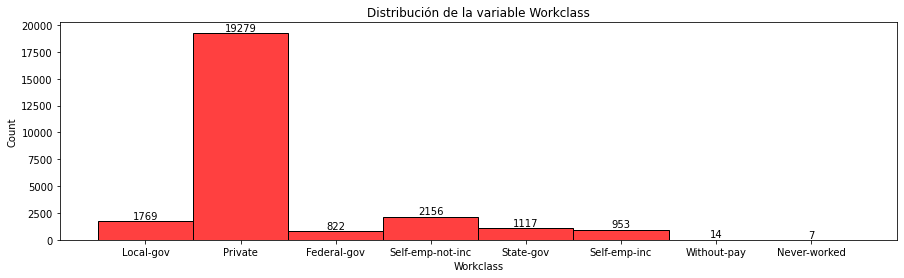

In [145]:
fig, ax = plt.subplots(figsize=(15,4))
y = sns.histplot(data=df.workclass, color = "red")
y.set(xlabel='Workclass')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Workclass")
plt.show()

####Reemplazamos valores nulos de "workclass" por la moda

 ✅ Vamos a instanciar nuestro objeto Simple Imputer de Sklearn para imputar bmi con la mediana y smoking status con la moda.

In [146]:
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

✅ Entrenamos nuestros imputadores, para esto usamos el método FIT.

In [147]:
imputer_mode.fit(df[['workclass']])

SimpleImputer(strategy='most_frequent')

✅ Ahora vamos a usar nuestros imputers en nuestras columnas, para esto usamos el método TRANSFORM.

In [148]:
df['workclass'] = imputer_mode.transform(df[['workclass']])

✅ Ahora revisemos si tenemos Nans



In [149]:
df.isna().sum()

index                0
age                  0
workclass            0
education            0
education.num        0
marital.status       0
occupation        1546
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     504
income               0
ID                   0
dtype: int64

#### ✅ Reducción de los niveles de la variable Workclass

In [150]:
df.workclass.unique()

array(['Local-gov', 'Private', 'Federal-gov', 'Self-emp-not-inc',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [151]:
def new_workclass(row):
  workclass = row.workclass
  if workclass in ('Without-pay', "Never-worked"):
    return 'Not-working'
  
  if workclass in ("Local-gov", "Federal-gov", "State-gov"):
    return 'Gov-employee'
  
  if workclass in ("Self-emp-not-inc", "Self-emp-inc"):
    return "Self-employed"
  
  return "Private"

In [152]:
df['new_workclass'] = df.apply(new_workclass, axis=1)

In [153]:
df.sample(10)

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID,new_workclass
24585,20604,41,Private,11th,7,Widowed,Other-service,Unmarried,White,Female,0,0,40,United-States,0,20595,Private
9371,10734,83,Private,HS-grad,9,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,0,10732,Private
24552,26131,40,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1,26116,Self-employed
27629,23345,32,Private,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,0,23333,Private
26480,31985,18,Private,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,30,United-States,0,31963,Private
15965,13316,29,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0,13313,Private
21436,3255,62,Private,Masters,14,Never-married,Handlers-cleaners,Not-in-family,White,Male,4650,0,40,United-States,0,3255,Private
7407,19820,58,State-gov,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,19813,Gov-employee
1229,10040,36,Private,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,1,10038,Private
22978,18625,36,Private,HS-grad,9,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,20,United-States,0,18619,Private


###Occupation 👨‍💼

In [154]:
df.occupation.nunique()

14

In [155]:
df.occupation.unique()

array(['Protective-serv', 'Exec-managerial', 'Craft-repair',
       'Prof-specialty', 'Tech-support', 'Other-service',
       'Transport-moving', 'Adm-clerical', 'Farming-fishing',
       'Handlers-cleaners', nan, 'Sales', 'Machine-op-inspct',
       'Priv-house-serv', 'Armed-Forces'], dtype=object)

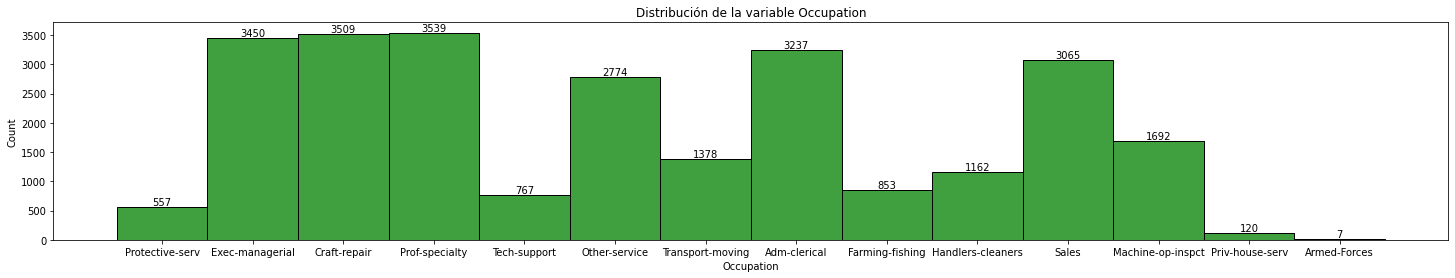

In [156]:
fig, ax = plt.subplots(figsize=(25,4))
y = sns.histplot(data=df.occupation, color = "green")
y.set(xlabel='Occupation')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Occupation")
plt.show()

In [157]:
imputer_mode.fit(df[['occupation']])


SimpleImputer(strategy='most_frequent')

In [158]:
df['occupation'] = imputer_mode.transform(df[['occupation']])

#### ✅ Reducción de los niveles de la variable Occupation

In [159]:
def new_occupation(row):
  occupation = row.occupation
  if occupation in ('Adm-clerical'):
    return 'Adm'
  
  if occupation in ("Craft-repair", "Transport-moving", "Farming-fishing", "Handlers-cleaners"):
    return 'Blue-Collar'
  
  if occupation in ("Armed-Forces"):
    return "Military"

  if occupation in ("Other-service"):
    return "Other-Occupations"
  
  if occupation in ("Prof-specialty"):
    return "Professional"
  
  if occupation in ("Exec-managerial"):
    return "White-Collar"

  if occupation in ("Protective-serv", "Tech-support", "Machine-op-inspct", "Priv-house-serv"):
    return "Service"

  return "Sales"

In [160]:
df['new_occupation'] = df.apply(new_occupation, axis=1)

In [161]:
df

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID,new_workclass,new_occupation
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,0,24451,Gov-employee,Service
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,1,985,Private,White-Collar
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,1,30229,Private,Blue-Collar
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,1,7107,Private,Professional
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0,27639,Private,White-Collar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,29823,31,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,0,29802,Private,Blue-Collar
27652,5390,51,Private,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1,5390,Private,Professional
27653,860,55,Federal-gov,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,1887,40,United-States,1,860,Gov-employee,Service
27654,15800,23,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,25,United-States,0,15795,Private,Sales


###Native Country 🌍

In [162]:
df['native.country'].nunique()

41

In [163]:
df['native.country'].value_counts()

United-States                 24811
Mexico                          532
Philippines                     167
Germany                         108
Canada                           97
Puerto-Rico                      94
El-Salvador                      94
India                            84
England                          78
Cuba                             77
Jamaica                          72
China                            65
Dominican-Republic               64
South                            64
Italy                            61
Vietnam                          56
Japan                            56
Poland                           48
Columbia                         46
Guatemala                        44
Haiti                            41
Taiwan                           40
Iran                             38
Portugal                         35
Nicaragua                        32
Greece                           27
Ecuador                          25
Peru                        

In [164]:
imputer_mode.fit(df[['native.country']])
df['native.country'] = imputer_mode.transform(df[['native.country']])

✅ Ahora revisemos si tenemos Nans

In [165]:
df.isna().sum()

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
ID                0
new_workclass     0
new_occupation    0
dtype: int64

In [166]:
df = df.rename(columns={"native.country":"country"})

#### ✅ Reducción de los niveles de la variable Native Country

In [167]:
def new_region(row):
  country = row.country
  if country in ('United-States', 'Canada'):
    return 'america_del_norte'
  
  if country in ("Cambodia", "China", "Hong", "India", 
                        "Iran", "Japan", "Laos", "Philippines", 
                        "Taiwan", "Thailand", "Vietnam"):
    return 'asia'
  
  if country in ("England", "France", "Germany", "Greece", 
                        "Holand-Netherlands", "Hungary", "Ireland", 
                        "Italy", "Poland", "Portugal", "Scotland","Yugoslavia"):
    return "europa"

  if country in ("Columbia", "Cuba", "Dominican-Republic", "Ecuador", 
                        "El-Salvador", "Guatemala", "Haiti", "Honduras", 
                        "Jamaica", "Mexico", "Nicaragua", "Outlying-US(Guam-USVI-etc)",
                        "Peru", "Puerto-Rico", "South", "Trinadad&Tobago"):
    return "latinoamerica"

  return

In [168]:
df['new_region'] = df.apply(new_region, axis=1)

###Education 👨‍🎓

In [169]:
df.education.nunique()

16

In [170]:
df.education.unique()

array(['HS-grad', 'Bachelors', 'Some-college', '7th-8th', 'Assoc-voc',
       'Masters', 'Assoc-acdm', '1st-4th', '5th-6th', 'Prof-school',
       '9th', '10th', '11th', '12th', 'Doctorate', 'Preschool'],
      dtype=object)

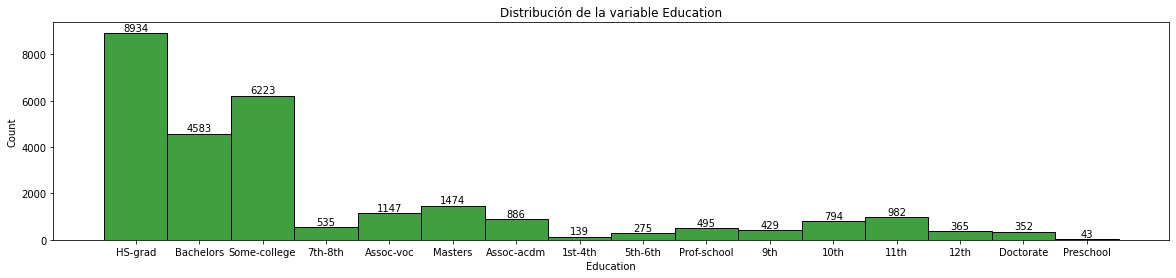

In [171]:
fig, ax = plt.subplots(figsize=(20,4))
y = sns.histplot(data=df.education, color = "green")
y.set(xlabel='Education')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Education")
plt.show()

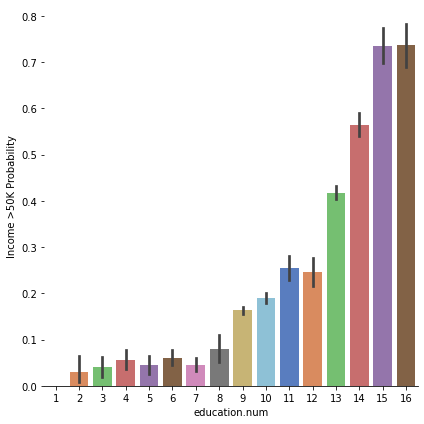

In [172]:
g = sns.catplot(x="education.num",y="income",data=df,kind="bar", height = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

#### ✅ Reducción de los niveles de la variable Education

In [173]:
def new_education(row):
  new_education = row.education
  if new_education in ("Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"):
    return 'primaria'
  
  if new_education in ('HS-grad'):
    return 'secundario'
  
  if new_education in ("Prof-school"):
    return "terciario"
  
  if new_education in ("Assoc-acdm", "Assoc-voc"):
    return "asociados"
  
  if new_education in ("Some-college"):
    return "universitario-incompleto"
  
  if new_education in ("Bachelors"):
    return "universitario"
  
  if new_education in ("Masters"):
    return "master"
  
  if new_education in ("Doctorate"):
    return "doctorado"

  return

df['new_education'] = df.apply(new_education, axis=1)

In [174]:
df

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,country,income,ID,new_workclass,new_occupation,new_region,new_education
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,0,24451,Gov-employee,Service,america_del_norte,secundario
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,1,985,Private,White-Collar,america_del_norte,universitario
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,1,30229,Private,Blue-Collar,america_del_norte,secundario
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,1,7107,Private,Professional,america_del_norte,universitario
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0,27639,Private,White-Collar,america_del_norte,secundario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,29823,31,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,0,29802,Private,Blue-Collar,america_del_norte,secundario
27652,5390,51,Private,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1,5390,Private,Professional,america_del_norte,asociados
27653,860,55,Federal-gov,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,1887,40,United-States,1,860,Gov-employee,Service,america_del_norte,secundario
27654,15800,23,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,25,United-States,0,15795,Private,Sales,america_del_norte,universitario


### Marital status 💍

In [175]:
df['marital.status'].unique()

array(['Divorced', 'Married-civ-spouse', 'Never-married', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

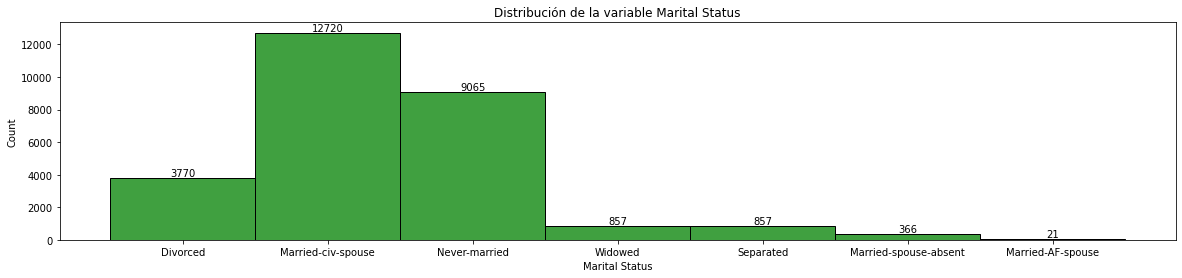

In [176]:
fig, ax = plt.subplots(figsize=(20,4))
y = sns.histplot(data=df['marital.status'], color = "green")
y.set(xlabel='Marital Status')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Marital Status")
plt.show()

In [177]:
df = df.rename(columns={"marital.status":"marital"})

###✅Reducción de los niveles de la variable Marital Status

```
# This is formatted as code
```



In [178]:
def new_marital_status(row):
  marital = row.marital
  if marital in ("Married-civ-spouse", "Married-AF-spouse"):
    return 'casado'
  
  if marital in ("Divorced", "Separated", "Married-spouse-absent" ):
    return 'separado'
  
  if marital in ("Widowed"):
    return "viudo"
  
  return "soltero"

df['new_marital_status'] = df.apply(new_marital_status, axis=1)

In [179]:
df

,index,age,workclass,education,education.num,marital,occupation,relationship,race,sex,...,capital.loss,hours.per.week,country,income,ID,new_workclass,new_occupation,new_region,new_education,new_marital_status
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,...,0,32,United-States,0,24451,Gov-employee,Service,america_del_norte,secundario,separado
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,1848,40,United-States,1,985,Private,White-Collar,america_del_norte,universitario,casado
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,...,0,60,United-States,1,30229,Private,Blue-Collar,america_del_norte,secundario,casado
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,0,60,United-States,1,7107,Private,Professional,america_del_norte,universitario,casado
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,...,0,40,United-States,0,27639,Private,White-Collar,america_del_norte,secundario,soltero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,29823,31,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,...,0,40,United-States,0,29802,Private,Blue-Collar,america_del_norte,secundario,casado
27652,5390,51,Private,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,0,40,United-States,1,5390,Private,Professional,america_del_norte,asociados,casado
27653,860,55,Federal-gov,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,...,1887,40,United-States,1,860,Gov-employee,Service,america_del_norte,secundario,casado
27654,15800,23,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,...,0,25,United-States,0,15795,Private,Sales,america_del_norte,universitario,soltero


####Relationship 👩‍👩‍👧‍👧

In [180]:
df['relationship'].unique()

array(['Own-child', 'Wife', 'Husband', 'Not-in-family', 'Unmarried',
       'Other-relative'], dtype=object)

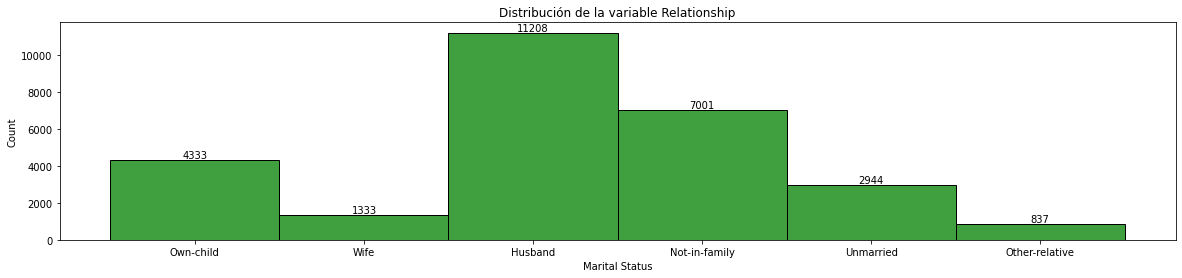

In [181]:
fig, ax = plt.subplots(figsize=(20,4))
y = sns.histplot(data=df['relationship'], color = "green")
y.set(xlabel='Marital Status')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Relationship")
plt.show()

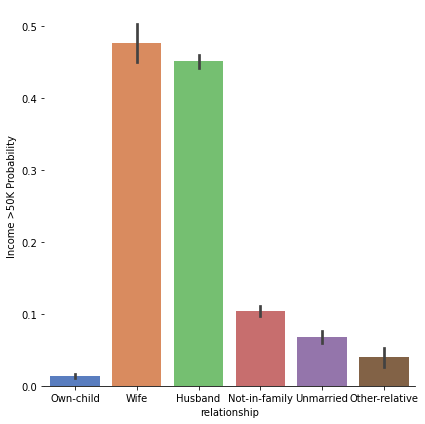

In [182]:
g = sns.catplot(x="relationship",y="income",data=df,kind="bar", height = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

###Race 🙍‍♀️🙍‍♂️

In [183]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [184]:
df.race.nunique()

5

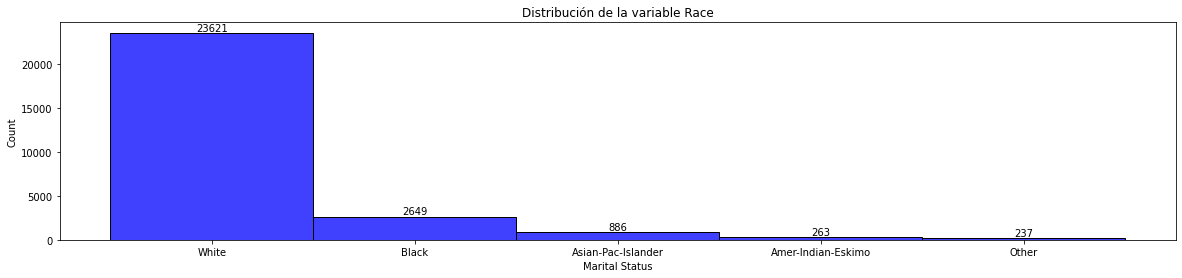

In [185]:
fig, ax = plt.subplots(figsize=(20,4))
y = sns.histplot(data=df['race'], color = "blue")
y.set(xlabel='Marital Status')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Race")
plt.show()

####✅Reducción de los niveles de la variable Race

In [186]:
map_race = {'White':0,
            'Black':1,"Asian-Pac-Islander":2,"Amer-Indian-Eskimo":2,
            'Other':2}

df['race'] = df['race'].replace(map_race)
df

,index,age,workclass,education,education.num,marital,occupation,relationship,race,sex,...,capital.loss,hours.per.week,country,income,ID,new_workclass,new_occupation,new_region,new_education,new_marital_status
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,0,Female,...,0,32,United-States,0,24451,Gov-employee,Service,america_del_norte,secundario,separado
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,0,Female,...,1848,40,United-States,1,985,Private,White-Collar,america_del_norte,universitario,casado
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,0,Male,...,0,60,United-States,1,30229,Private,Blue-Collar,america_del_norte,secundario,casado
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,0,Male,...,0,60,United-States,1,7107,Private,Professional,america_del_norte,universitario,casado
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,0,Female,...,0,40,United-States,0,27639,Private,White-Collar,america_del_norte,secundario,soltero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,29823,31,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,2,Male,...,0,40,United-States,0,29802,Private,Blue-Collar,america_del_norte,secundario,casado
27652,5390,51,Private,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,0,Male,...,0,40,United-States,1,5390,Private,Professional,america_del_norte,asociados,casado
27653,860,55,Federal-gov,HS-grad,9,Married-civ-spouse,Tech-support,Husband,0,Male,...,1887,40,United-States,1,860,Gov-employee,Service,america_del_norte,secundario,casado
27654,15800,23,Private,Bachelors,13,Never-married,Sales,Not-in-family,0,Male,...,0,25,United-States,0,15795,Private,Sales,america_del_norte,universitario,soltero


###Sex 🙍‍♀️🙍‍♂️

In [302]:
df.sex.value_counts()

Male      18521
Female     9135
Name: sex, dtype: int64

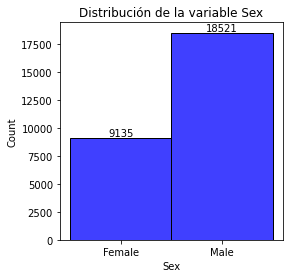

In [303]:
fig, ax = plt.subplots(figsize=(4,4))
y = sns.histplot(data=df['sex'], color = "blue")
y.set(xlabel='Sex')
y.bar_label(y.containers[0])
plt.title("Distribución de la variable Sex")
plt.show()

##Análisis Variables Numéricas

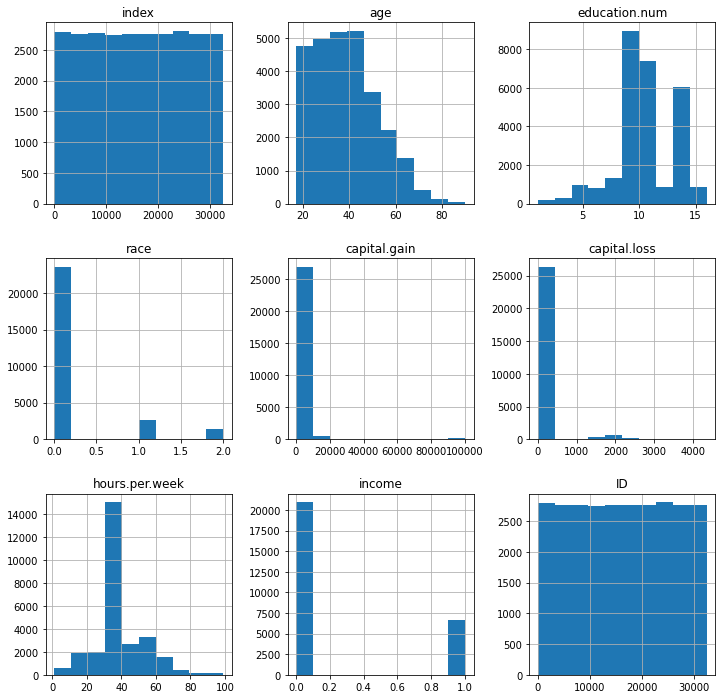

In [189]:
df.hist(figsize = (12,12), layout = (3,3), sharex = False);

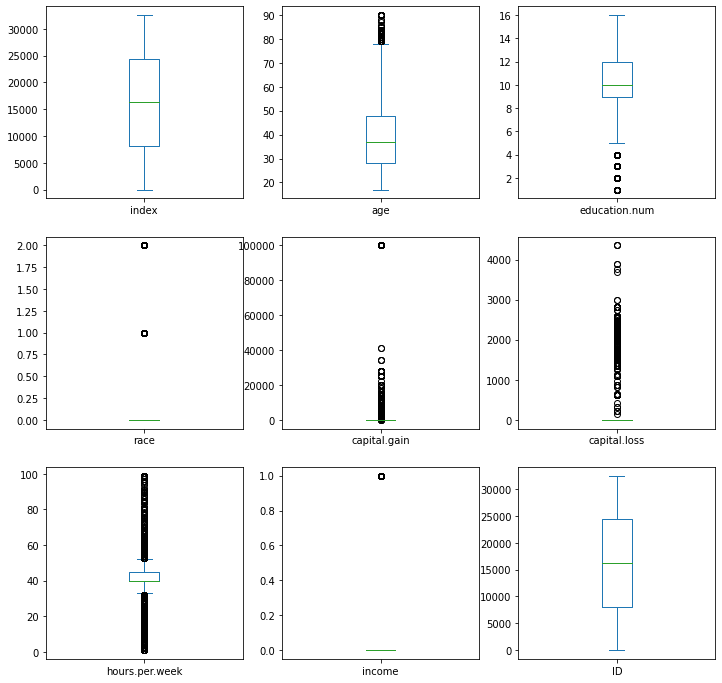

In [190]:
df.plot(kind = 'box', figsize = (12, 12), layout = (3, 3), sharex = False, subplots = True);

###Edad👨‍🦳

In [191]:
df["age"].max()

90

In [192]:
df["age"].min()

17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


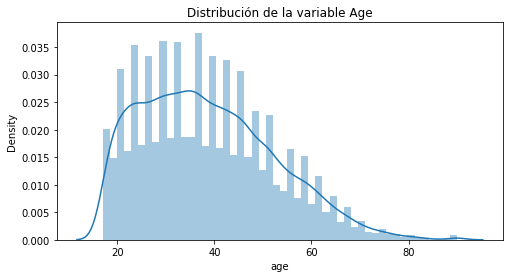

In [193]:
fig = plt.figure(figsize=(8,4))
sns.distplot(df.age)
plt.title("Distribución de la variable Age")
plt.show()

Dado que nuestro dataset está desbalanceado, sería una pérdida importante eliminar los outliers.

Outlier Detection
We further proceed to detect outliers in our data and decide how to deal with them. The best way to interpret outliers using visualizations is boxplot, hence we plot boxplots for our numerical columns, which result in the below visuatization
We observe outliers in all the numeric columns. We use Zscore values to confirm how much data, out of the complete dataset, falls in an outlier range.

‘Z-score (also called a standard score) gives an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.’

After calculating the number of rows containing outliers, we find that we would lose 2733 rows taking a threshold value of zscore as 3. This data has 1546 rows with census income less than 50K$ and 1187 rows with higher income than 50K$. Since our dataset is already imbalanced, losing this number of rows with further increase the imbalance, and would be a significant loss if we consider the rows with income higher than 50K$.

Hence, we keep the rows and proceed with the next steps.

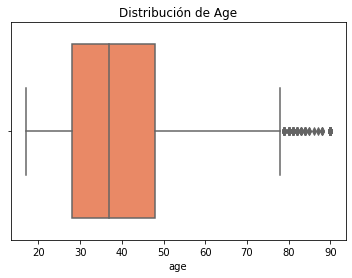

In [194]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df['age'], color="coral")
ax.set_title("Distribución de Age")
plt.show()

####✅Reducción de los niveles de la variable Age

In [195]:
bins = [0, 25, 60, 75, 100]

In [196]:
names = ["joven", "adulto", "adulto_mayor", "jubilado"]

In [197]:
df["age"] = pd.cut(df["age"], bins, labels = names, include_lowest = True)

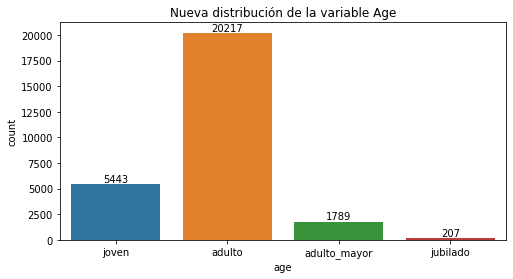

In [198]:
fig = plt.figure(figsize=(8,4))
age = sns.countplot(x="age", data = df)
age.bar_label(age.containers[0])
plt.title("Nueva distribución de la variable Age")
plt.show()

###Horas🕗

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


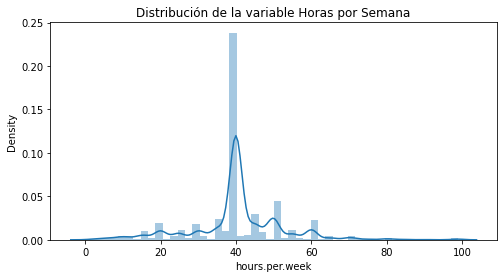

In [199]:
fig = plt.figure(figsize=(8,4))
sns.distplot(df["hours.per.week"])
plt.title("Distribución de la variable Horas por Semana")
plt.show()

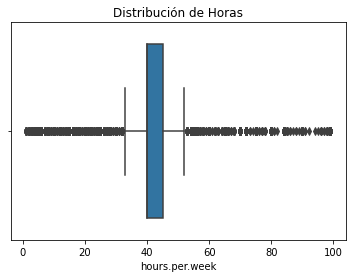

In [200]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df['hours.per.week'])
ax.set_title("Distribución de Horas")
plt.show()

####✅Reducción de los niveles de la variable Hours per week

In [201]:
df["hours.per.week"].max()

99

In [202]:
bins_hs = [0, 20, 40, 60, 100]

In [203]:
names_hs = ["media_jornada", "jornada_completa", "jornada_extendida", "sin_descanso"]

In [204]:
df["hours.per.week"] = pd.cut(df["hours.per.week"], bins_hs, labels = names_hs, include_lowest = True)

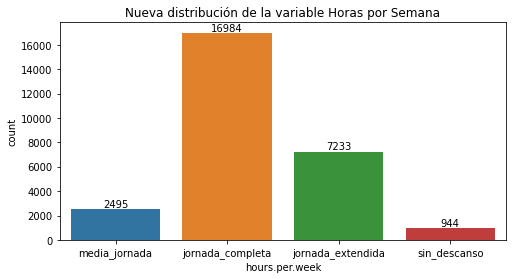

In [205]:
fig = plt.figure(figsize=(8,4))
hs = sns.countplot(x="hours.per.week", data = df)
hs.bar_label(hs.containers[0])
plt.title("Nueva distribución de la variable Horas por Semana")
plt.show()

###Capital Gain💵

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


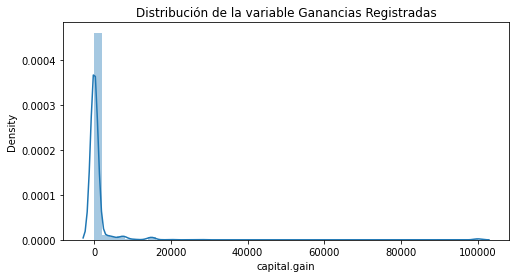

In [206]:
fig = plt.figure(figsize=(8,4))
sns.distplot(df["capital.gain"])
plt.title("Distribución de la variable Ganancias Registradas")
plt.show()  #distribución sesgada

In [207]:
median_gain = df["capital.gain"].median()
median_gain

0.0

In [208]:
mean_gain = df["capital.gain"].mean()
mean_gain

1099.9915027480474

In [209]:
max_gain = df["capital.gain"].max()
max_gain

99999

In [210]:
bins_gain = [0, 10000, 20000, max_gain]

In [211]:
names_gain = [ "muy bajo", "bajo", "alto"]

In [212]:
df["capital.gain_2"] = pd.cut(df["capital.gain"], bins_gain, labels = names_gain, include_lowest = True)

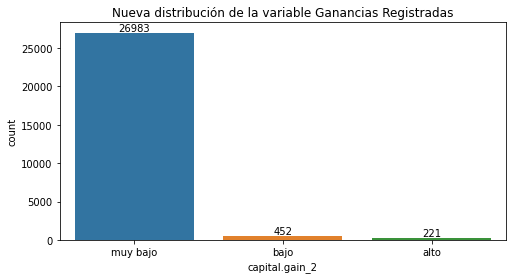

In [213]:
fig = plt.figure(figsize=(8,4))
gain = sns.countplot(x="capital.gain_2", data = df)
gain.bar_label(gain.containers[0])
plt.title("Nueva distribución de la variable Ganancias Registradas")
plt.show()

###Capital Loss 💵

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


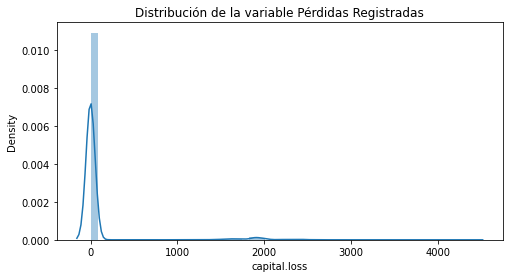

In [214]:
fig = plt.figure(figsize=(8,4))
sns.distplot(df["capital.loss"])
plt.title("Distribución de la variable Pérdidas Registradas")
plt.show() #distribución sesgada

In [215]:
median_loss = df["capital.loss"].median()
median_loss

0.0

In [216]:
mean_loss = df["capital.loss"].mean()
mean_loss

88.28438675151865

In [217]:
max_loss = df["capital.loss"].max()

In [218]:
bins_loss = [0, 1000, 2000, max_loss]

In [219]:
names_loss = [ "muy bajo", "bajo", "alto"]

In [220]:
df["capital.loss_2"] = pd.cut(df["capital.loss"], bins_loss, labels = names_loss, include_lowest = True)

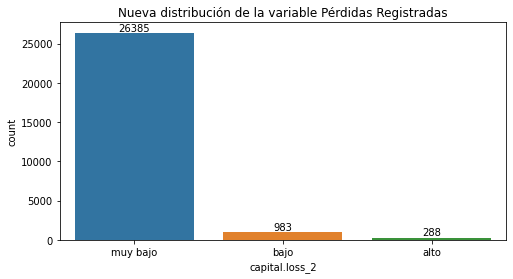

In [221]:
fig = plt.figure(figsize=(8,4))
gain = sns.countplot(x="capital.loss_2", data = df)
gain.bar_label(gain.containers[0])
plt.title("Nueva distribución de la variable Pérdidas Registradas")
plt.show()

##Visualizaciones

In [222]:
df

,index,age,workclass,education,education.num,marital,occupation,relationship,race,sex,...,country,income,ID,new_workclass,new_occupation,new_region,new_education,new_marital_status,capital.gain_2,capital.loss_2
0,24466,adulto,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,0,Female,...,United-States,0,24451,Gov-employee,Service,america_del_norte,secundario,separado,muy bajo,muy bajo
1,985,adulto,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,0,Female,...,United-States,1,985,Private,White-Collar,america_del_norte,universitario,casado,muy bajo,bajo
2,30250,adulto,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,0,Male,...,United-States,1,30229,Private,Blue-Collar,america_del_norte,secundario,casado,muy bajo,muy bajo
3,7107,adulto,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,0,Male,...,United-States,1,7107,Private,Professional,america_del_norte,universitario,casado,muy bajo,muy bajo
4,27656,adulto,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,0,Female,...,United-States,0,27639,Private,White-Collar,america_del_norte,secundario,soltero,muy bajo,muy bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,29823,adulto,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,2,Male,...,United-States,0,29802,Private,Blue-Collar,america_del_norte,secundario,casado,muy bajo,muy bajo
27652,5390,adulto,Private,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,0,Male,...,United-States,1,5390,Private,Professional,america_del_norte,asociados,casado,muy bajo,muy bajo
27653,860,adulto,Federal-gov,HS-grad,9,Married-civ-spouse,Tech-support,Husband,0,Male,...,United-States,1,860,Gov-employee,Service,america_del_norte,secundario,casado,muy bajo,bajo
27654,15800,joven,Private,Bachelors,13,Never-married,Sales,Not-in-family,0,Male,...,United-States,0,15795,Private,Sales,america_del_norte,universitario,soltero,muy bajo,muy bajo


###Ingresos por rango etario 📈

In [223]:
menos_50 = df.income == 0

In [224]:
menos_50.value_counts()

True     20953
False     6703
Name: income, dtype: int64

In [225]:
df_mask=df['income']== 0
menos_50 = df[df_mask]
result_menos50 = menos_50.groupby('age')['index'].nunique()
result_menos50

age
joven            5347
adulto          14081
adulto_mayor     1353
jubilado          172
Name: index, dtype: int64

In [226]:
df_mask2=df['income']== 1
mayor_50 = df[df_mask2]
result_mayor50 = mayor_50.groupby('age')['index'].nunique()
result_mayor50

age
joven             96
adulto          6136
adulto_mayor     436
jubilado          35
Name: index, dtype: int64

In [227]:
labels = ["joven", "adulto", "adulto_mayor", "jubilado"]

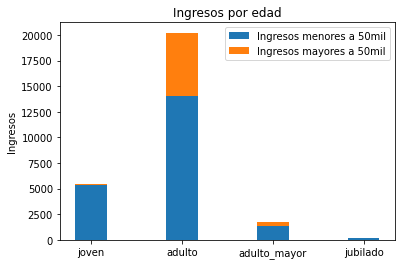

In [228]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, result_menos50, width, label='Ingresos menores a 50mil')
ax.bar(labels, result_mayor50, width, bottom=result_menos50,
       label='Ingresos mayores a 50mil')

ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por edad')
ax.legend()


plt.show()

###Ingresos por nivel educativo 📈

In [229]:
education_menos50 = menos_50.groupby('new_education')['index'].nunique()
education_menos50

new_education
asociados                   1523
doctorado                     93
master                       643
primaria                    3376
secundario                  7475
terciario                    131
universitario               2668
universitario-incompleto    5044
Name: index, dtype: int64

In [230]:
education_mayor50 = mayor_50.groupby('new_education')['index'].nunique()
education_mayor50

new_education
asociados                    510
doctorado                    259
master                       831
primaria                     186
secundario                  1459
terciario                    364
universitario               1915
universitario-incompleto    1179
Name: index, dtype: int64

In [231]:
labels_2 = ["primaria", "secundaria", "terciario", "asociados", "universitario-incompleto", "universitario","maestría", "doctorado"]

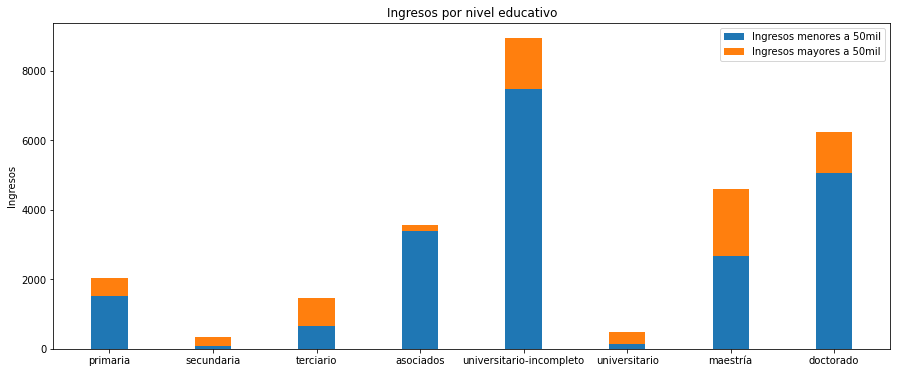

In [232]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(labels_2, education_menos50, width, label='Ingresos menores a 50mil')
ax.bar(labels_2, education_mayor50, width, bottom=education_menos50,
       label='Ingresos mayores a 50mil')

ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por nivel educativo')
ax.legend()


plt.show()

###Ingresos por sexo 📈

In [233]:
sex_menos50 = menos_50.groupby('sex')['index'].nunique()
sex_menos50

sex
Female     8121
Male      12832
Name: index, dtype: int64

In [234]:
sex_mayor50 = mayor_50.groupby('sex')['index'].nunique()
sex_mayor50

sex
Female    1014
Male      5689
Name: index, dtype: int64

In [235]:
labels_3 = ["Female", "Male"] 

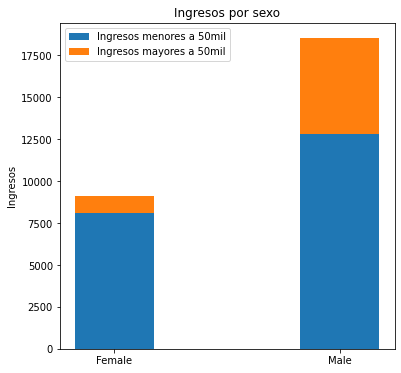

In [236]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(6, 6))

ax.bar(labels_3,sex_menos50, width, label='Ingresos menores a 50mil')
ax.bar(labels_3, sex_mayor50, width, bottom=sex_menos50,
       label='Ingresos mayores a 50mil')

ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por sexo')
ax.legend()


plt.show()

###Ingresos por relationship 📈

In [237]:
rel_menos50 = menos_50.groupby('relationship')['index'].nunique()
rel_menos50

relationship
Husband           6156
Not-in-family     6274
Other-relative     804
Own-child         4275
Unmarried         2746
Wife               698
Name: index, dtype: int64

In [238]:
rel_mayor50 = mayor_50.groupby('relationship')['index'].nunique()
rel_mayor50

relationship
Husband           5052
Not-in-family      727
Other-relative      33
Own-child           58
Unmarried          198
Wife               635
Name: index, dtype: int64

In [239]:
labels_4 = df.relationship.unique()

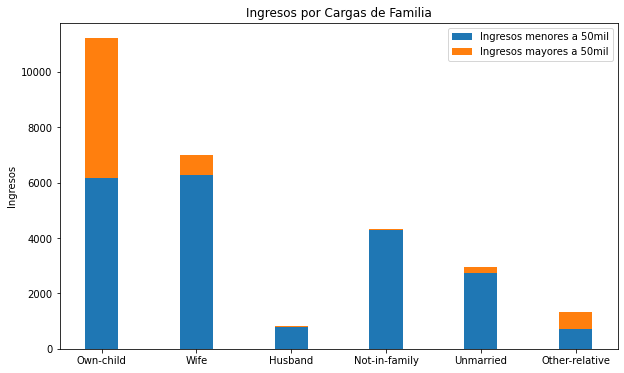

In [240]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(labels_4,rel_menos50, width, label='Ingresos menores a 50mil')
ax.bar(labels_4, rel_mayor50, width, bottom=rel_menos50,
       label='Ingresos mayores a 50mil')

ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por Cargas de Familia')
ax.legend()


plt.show()

###Ingresos por workclass 📈

In [241]:
work_menos50 = menos_50.groupby('new_workclass')['index'].nunique()
work_menos50


new_workclass
Gov-employee      2557
Not-working         21
Private          16416
Self-employed     1959
Name: index, dtype: int64

In [242]:
work_mayor50 = mayor_50.groupby('new_workclass')['index'].nunique()
work_mayor50


new_workclass
Gov-employee     1151
Private          4402
Self-employed    1150
Name: index, dtype: int64

In [243]:
labels_5 = df["new_workclass"].unique()
labels_5

array(['Gov-employee', 'Private', 'Self-employed', 'Not-working'],
      dtype=object)

ValueError: ignored

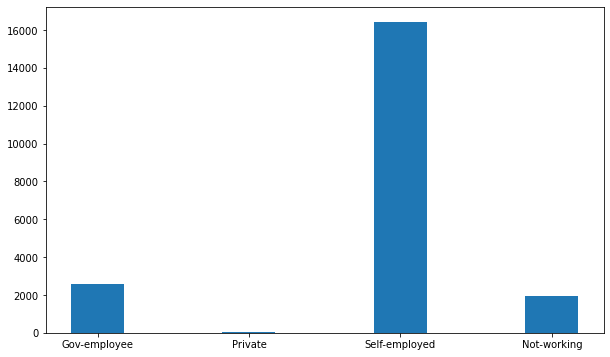

In [244]:
width = 0.35      

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(labels_5,work_menos50, width, label='Ingresos menores a 50mil')
ax.bar(labels_5, work_mayor50, width, bottom=work_menos50, label='Ingresos mayores a 50mil')

ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por Tipo de Empleo')
ax.legend()


plt.show()

###Ingresos por hours per week 📈

In [270]:
hs_menos50 = menos_50.groupby('hours.per.week')['index'].nunique()
hs_menos50

hours.per.week
media_jornada         2324
jornada_completa     13754
jornada_extendida     4280
sin_descanso           595
Name: index, dtype: int64

In [271]:
hs_mayor50 = mayor_50.groupby('hours.per.week')['index'].nunique()
hs_mayor50

hours.per.week
media_jornada         171
jornada_completa     3230
jornada_extendida    2953
sin_descanso          349
Name: index, dtype: int64

In [275]:
labels_6 = ["media_jornada","jornada_completa","jornada_extendida","sin_descanso"]
labels_6

['media_jornada', 'jornada_completa', 'jornada_extendida', 'sin_descanso']

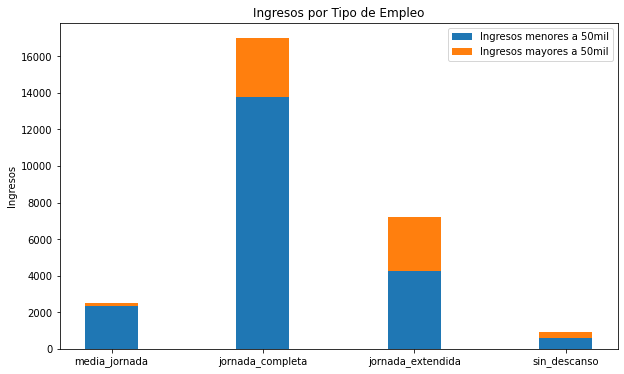

In [277]:
width = 0.35      

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(labels_6,hs_menos50, width, label='Ingresos menores a 50mil')
ax.bar(labels_6, hs_mayor50, width, bottom=hs_menos50, label='Ingresos mayores a 50mil')

ax.set_ylabel('Ingresos')
ax.set_title('Ingresos por Tipo de Jornada')
ax.legend()


plt.show()

###Ingresos por race 📈

In [278]:
race_menos50 = menos_50.groupby('race')['index'].nunique()
race_menos50

race
0    17526
1     2328
2     1099
Name: index, dtype: int64

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               27656 non-null  int64   
 1   age                 27656 non-null  category
 2   workclass           27656 non-null  object  
 3   education           27656 non-null  object  
 4   education.num       27656 non-null  int64   
 5   marital             27656 non-null  object  
 6   occupation          27656 non-null  object  
 7   relationship        27656 non-null  object  
 8   race                27656 non-null  int64   
 9   sex                 27656 non-null  object  
 10  capital.gain        27656 non-null  int64   
 11  capital.loss        27656 non-null  int64   
 12  hours.per.week      27656 non-null  category
 13  country             27656 non-null  object  
 14  income              27656 non-null  int64   
 15  ID                  27656 non-null  

In [246]:
df.drop(columns=['index','workclass','education',
                 'education.num','marital','occupation', 'race',
                 'country', 'ID'], inplace = True)#no eliminé las columnas capital.gain y capital.loss

In [247]:
df

,age,relationship,sex,capital.gain,capital.loss,hours.per.week,income,new_workclass,new_occupation,new_region,new_education,new_marital_status,capital.gain_2,capital.loss_2
0,adulto,Own-child,Female,0,0,jornada_completa,0,Gov-employee,Service,america_del_norte,secundario,separado,muy bajo,muy bajo
1,adulto,Wife,Female,0,1848,jornada_completa,1,Private,White-Collar,america_del_norte,universitario,casado,muy bajo,bajo
2,adulto,Husband,Male,0,0,jornada_extendida,1,Private,Blue-Collar,america_del_norte,secundario,casado,muy bajo,muy bajo
3,adulto,Husband,Male,0,0,jornada_extendida,1,Private,Professional,america_del_norte,universitario,casado,muy bajo,muy bajo
4,adulto,Not-in-family,Female,0,0,jornada_completa,0,Private,White-Collar,america_del_norte,secundario,soltero,muy bajo,muy bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,adulto,Husband,Male,0,0,jornada_completa,0,Private,Blue-Collar,america_del_norte,secundario,casado,muy bajo,muy bajo
27652,adulto,Husband,Male,0,0,jornada_completa,1,Private,Professional,america_del_norte,asociados,casado,muy bajo,muy bajo
27653,adulto,Husband,Male,0,1887,jornada_completa,1,Gov-employee,Service,america_del_norte,secundario,casado,muy bajo,bajo
27654,joven,Not-in-family,Male,0,0,jornada_completa,0,Private,Sales,america_del_norte,universitario,soltero,muy bajo,muy bajo


###Conversión de todas las variables a variables binarias

In [248]:
df = pd.get_dummies(df, drop_first = True )

###Definimos X e Y

In [249]:
y=df['income'] #variable objetivo
y

0        0
1        1
2        1
3        1
4        0
        ..
27651    0
27652    1
27653    1
27654    0
27655    0
Name: income, Length: 27656, dtype: int64

In [250]:
X=df.drop(['income'], axis=1) #vector de entrada
X

,capital.gain,capital.loss,age_adulto,age_adulto_mayor,age_jubilado,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,...,new_education_terciario,new_education_universitario,new_education_universitario-incompleto,new_marital_status_separado,new_marital_status_soltero,new_marital_status_viudo,capital.gain_2_bajo,capital.gain_2_alto,capital.loss_2_bajo,capital.loss_2_alto
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1848,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27652,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27653,0,1887,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
27654,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


### Train Test Split

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Definición de Modelos

In [304]:
from sklearn.preprocessing import StandardScaler

In [305]:
map_age={'joven':0,
            'adulto':1,
           "adulto-mayor":2,
           "jubliado":3}

df['age'] = df['age'].replace(map_race)
df

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,0,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,1,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,1,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,1,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0,27639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27651,29823,31,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,0,29802
27652,5390,51,Private,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1,5390
27653,860,55,Federal-gov,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,1887,40,United-States,1,860
27654,15800,23,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,25,United-States,0,15795


In [ ]:
scaler = StandardScaler()
columnas_numericas = ['age', 'hours.per.week'] 
scaler.fit(X_train[columnas_numericas])
X_train[columnas_numericas] = scaler.transform(X_train[columnas_numericas])
X_train[columnas_numericas].head()

### Decision Tree 

In [311]:
from sklearn.tree import DecisionTreeClassifier

max_depths = np.arange(1, 15)
max_depths

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [253]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [254]:
#Realizo las predicciones

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [255]:
#Evalúo su accuracy

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aciertos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc)

Porcentaje de aciertos sobre el set de entrenamiento: 0.8046465376966191
Porcentaje de aciertos sobre el set de evaluación: 0.8000723065798988


###KNN Classifier

✅ Ahora vamos a entrenar un KNN Classifier y comparar los resultados con el árbol de decisión.

In [266]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [267]:
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

In [268]:
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)

print('Porcentaje de aciertos sobre el set de entrenamiento:', train_acc_knn)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc_knn)

Porcentaje de aciertos sobre el set de entrenamiento: 0.8672482372084614
Porcentaje de aciertos sobre el set de evaluación: 0.8517715112075199


###Random Forest

In [332]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Porcentaje de aciertos sobre el set de entrenamiento: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Porcentaje de aciertos sobre el set de evaluación: {:,.3f}".format(rfc.score(X_test, y_test)))

Porcentaje de aciertos sobre el set de entrenamiento: 0.896
Porcentaje de aciertos sobre el set de evaluación: 0.852


##Matriz de Confusión

In [320]:
from sklearn.metrics import confusion_matrix

In [321]:
from sklearn.metrics import plot_confusion_matrix

###Decision Tree

In [322]:
confusion_matrix(y_test, y_test_pred)

array([[4166,    5],
       [1101,  260]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


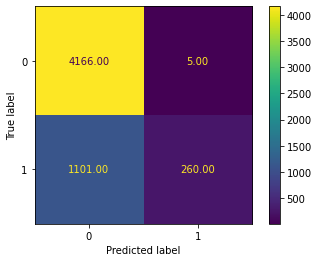

In [323]:
tree = DecisionTreeClassifier(max_depth=3)

tree.fit(X_train, y_train)

plot_confusion_matrix(tree, X_test, y_test, values_format = '.2f')

plt.show()

In [327]:
precision_tree = 5/(5+260)
precision_tree

0.018867924528301886

###KNN Classifier

In [313]:
confusion_matrix(y_test, y_test_pred_knn)

array([[3818,  353],
       [ 467,  894]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


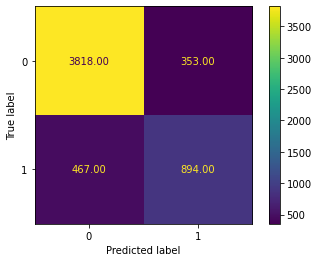

In [324]:
knn_clas = DecisionTreeClassifier(max_depth=3)

knn_clas.fit(X_train, y_train)

plot_confusion_matrix(knn, X_test, y_test, values_format = '.2f')

plt.show()

###Random Forest

In [314]:
confusion_matrix(y_test, prediction1)

array([[3887,  284],
       [ 529,  832]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


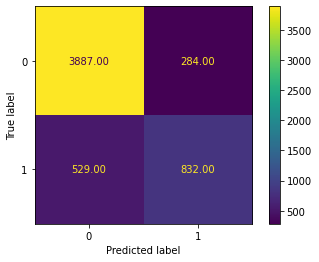

In [325]:
rand_forest = DecisionTreeClassifier(max_depth=3)

rand_forest.fit(X_train, y_train)

plot_confusion_matrix(rfc, X_test, y_test, values_format = '.2f')

plt.show()

##Reporte de Clasificación

In [315]:
from sklearn.metrics import classification_report

In [329]:
print(classification_report(y_test, y_test_pred)) #Decision Tree

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4171
           1       0.98      0.19      0.32      1361

    accuracy                           0.80      5532
   macro avg       0.89      0.59      0.60      5532
weighted avg       0.84      0.80      0.74      5532



In [330]:
print(classification_report(y_test, y_test_pred_knn)) #KNN Classifier

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4171
           1       0.72      0.66      0.69      1361

    accuracy                           0.85      5532
   macro avg       0.80      0.79      0.79      5532
weighted avg       0.85      0.85      0.85      5532



In [334]:
print(classification_report(y_test, prediction1 )) #Random Forest

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4171
           1       0.74      0.61      0.67      1361

    accuracy                           0.85      5532
   macro avg       0.81      0.77      0.79      5532
weighted avg       0.85      0.85      0.85      5532



In [318]:
sklearn.metrics.f1_score

NameError: ignored